In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
%store -r wr

In [3]:
# Create arrays for the features and the response variable
# New rb to test float v ints

new_wr = wr.drop(columns=['Player','Tm','FantPos','Cmp','Att','Yds',
                          'TD','Int','DKPt','FDPt','VBD',
                          'PosRank','OvRank'],axis=1)

new_wr['FantPt'] = new_wr['FantPt'].astype(np.int64)
new_wr['Year'] = new_wr['Year'].astype(np.int64)

In [4]:
# Get rid of current year points and shift up next years FantPts
y_wr = new_wr['FantPt']
conv_years = [1 if values == 2018 else 0 for values in new_wr.Year]
new_wr['Year'] = conv_years
X_wr = new_wr.drop(columns=['FantPt'],axis=1)

In [5]:
X_wr.head()

,Age,G,GS,Att.1,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,Year
0,24,16,16,22,151,6.86,1,137,87,1479,17.00,12,0,0,14,0.0,0.0,334.0,1
1,30,15,15,0,0,0.00,0,168,104,1297,12.47,15,0,0,15,0.0,0.0,323.7,1
2,26,15,15,0,0,0.00,0,169,111,1386,12.49,13,0,0,13,1.0,0.0,329.6,1
3,26,16,16,1,-7,-7.00,0,163,115,1572,13.67,11,2,2,11,0.0,0.0,333.5,1
4,29,16,16,2,12,6.00,0,170,113,1677,14.84,8,2,2,8,0.0,0.0,325.9,1


In [6]:
y_wr.head()

0    247
1    220
2    219
3    219
4    213
Name: FantPt, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_wr, y_wr, test_size=0.275,
                                                    random_state=411)

In [8]:
# Creating Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
# Scoring the Linear Regression Model
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
print("Linear Regression Train Score:", train_score.round(7))
print("Linear Regression Test Score:", test_score.round(7))
# Predict on the test data: y_pred
y_pred = lr.predict(X_test)
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse.round(5)))

Linear Regression Train Score: 0.9993445
Linear Regression Test Score: 0.9995983
Root Mean Squared Error: 0.85603


In [9]:
# Random Forest Regression Scores
rf = RandomForestRegressor(n_estimators=2000)
rf.fit(X_train, y_train)
# Scoring the Random Forrest Regression Model
RF_train_score = rf.score(X_train,y_train)
RF_test_score = rf.score(X_test, y_test)
print("Random Forest Regression Train Score:", RF_train_score.round(7))
print("Random Forest Regression Test Score:", RF_test_score.round(7))
# Predict on the test data: y_pred_rf
y_pred_rf = rf.predict(X_test)
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error: {}".format(rmse.round(5)))

Random Forest Regression Train Score: 0.997807
Random Forest Regression Test Score: 0.9869062
Root Mean Squared Error: 4.88731


In [10]:
# Random Forest Regression does not have coefficients so we cannot visualize

In [11]:
# Creating Ridge Regression Model - Low Alpha
rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)
# Scoring the Ridge Regression Model
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
coeff_used01 = np.sum(rr.coef_!=0)
print("Ridge Regression Train Score Low Alpha:", Ridge_train_score.round(7))
print("Ridge Regression Test Score Low Alpha:", Ridge_test_score.round(7))
print("Number of Features Used for Alpha=100:", coeff_used01)
# Predict on the test data: y_pred
y_pred_rr = rr.predict(X_test)
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rr))
print("Root Mean Squared Error: {}".format(rmse.round(5)))

Ridge Regression Train Score Low Alpha: 0.9993445
Ridge Regression Test Score Low Alpha: 0.9995984
Number of Features Used for Alpha=100: 19
Root Mean Squared Error: 0.85587


In [12]:
# Ridge Regression Analysis - High Alpha
rr100 = Ridge(alpha=100)
rr100.fit(X_train, y_train)
# Scoring the Ridge Regression Model
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
coeff_used100 = np.sum(rr100.coef_!=0)
print("Ridge Regression Train Score Low Alpha:", Ridge_train_score.round(7))
print("Ridge Regression Test Score Low Alpha:", Ridge_test_score.round(7))
print("Number of Features Used for Alpha=100:", coeff_used100)
# Predict on the test data: y_pred
y_pred_rr100 = rr100.predict(X_test)
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rr100))
print("Root Mean Squared Error: {}".format(rmse.round(5)))

Ridge Regression Train Score Low Alpha: 0.9993445
Ridge Regression Test Score Low Alpha: 0.9995984
Number of Features Used for Alpha=100: 19
Root Mean Squared Error: 0.92817


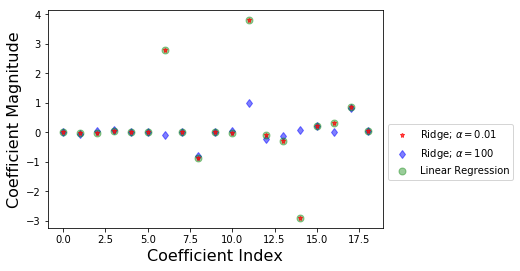

In [13]:
# Plot for Ridge Regression Coefficient - Low Alpha
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,
         color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 

# Plot for Ridge Regression Coefficient - High Alpha
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,
         color='blue',label=r'Ridge; $\alpha = 100$') 

# Plot for Linear Regression Coefficient
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,
         color='green',label='Linear Regression')

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

In [14]:
# This plot is a viual display of how the lower alpha better fits our dataset

In [15]:
# Lasso Scores for 0.01 Alpha
lasso01 = Lasso(alpha=0.01, max_iter=10e5)
lasso01.fit(X_train,y_train)
# Scoring the Lasso Regression Model
train_score01=lasso01.score(X_train,y_train)
test_score01=lasso01.score(X_test,y_test)
coeff_used01 = np.sum(lasso01.coef_!=0)
print("Lasso Training Score for Alpha=0.01:", train_score01.round(7))
print("Lasso Test Score for Alpha=0.01:", test_score01.round(7))
print("Number of Features Used for Alpha=0.01:", coeff_used01)
# Predict on the test data: y_pred_lasso01
y_pred_lasso01 = lasso01.predict(X_test)
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso01))
print("Root Mean Squared Error: {}".format(rmse.round(5)))

Lasso Training Score for Alpha=0.01: 0.9993367
Lasso Test Score for Alpha=0.01: 0.9995982
Number of Features Used for Alpha=0.01: 18
Root Mean Squared Error: 0.85613


In [16]:
# Lasso Scores for 0.0001 Alpha
lasso0001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso0001.fit(X_train,y_train)
# Scoring the Lasso Regression Model
train_score0001 = lasso0001.score(X_train,y_train)
test_score0001 = lasso0001.score(X_test,y_test)
coeff_used0001 = np.sum(lasso0001.coef_!=0)
print("Lasso Training Score for Alpha=0.0001:", train_score0001.round(7))
print("Lasso Test Score for Alpha=0.0001: ", test_score0001.round(7))
print("Number of Features Used for Alpha=0.0001:", coeff_used0001)
# Predict on the test data: y_pred_lasso0001
y_pred_lasso0001 = lasso0001.predict(X_test)
# Compute and print R^2 and RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso0001))
print("Root Mean Squared Error: {}".format(rmse.round(5)))

Lasso Training Score for Alpha=0.0001: 0.9993445
Lasso Test Score for Alpha=0.0001:  0.9995984
Number of Features Used for Alpha=0.0001: 19
Root Mean Squared Error: 0.85595


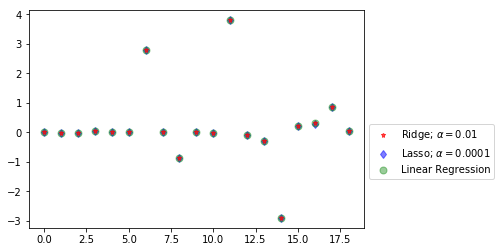

In [17]:
# Linear Regression scores plot with Ridge Regression & Lasso Coefficient

# Plot for Ridge Regression Coefficient - Low Alpha
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,
         color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 

# Plot for Lasso Regression Coefficient - Alpha 0.0001
plt.plot(lasso0001.coef_,alpha=0.5,linestyle='none',marker='d',
         markersize=6,color='blue',label=r'Lasso; $\alpha = 0.0001$')

# Plot for Linear Regression Coefficient
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,
         color='green',label='Linear Regression')

plt.legend(bbox_to_anchor=(1, 0.5))

In [18]:
# Ridge Regression with the lowest Alpha (0.01) gives us the best fit
# for this dataset
# The Random Forest Regression model was the worst of all the models tested
# Lasso Regression with the lowest Alpha (0.0001) was very close behind Ridge

In [19]:
# Predicting WRs with Linear Regression
top35_wrs = X_wr[:35]
y_top35_wrs = lr.predict(top35_wrs)
# Creating DataFrame to Visualize Prediction Results
y_top35_wrs = pd.DataFrame(y_top35_wrs)
wr_names = wr['Player'][:35]
frames = [wr_names, y_top35_wrs]
wr_names_pred = pd.concat(frames, axis=1)
wr_names_pred.columns = ['Player', 'Predicted FantPt']
wr_names_pred.sort_values(['Predicted FantPt'],ascending=False)

,Player,Predicted FantPt
0,Tyreek Hill,243.705666
1,Antonio Brown,220.545425
2,Davante Adams,219.221713
3,DeAndre Hopkins,218.996538
4,Julio Jones,213.763174
5,Mike Evans,196.139180
6,Adam Thielen,194.905591
7,Michael Thomas,190.648359
8,JuJu Smith-Schuster,186.445684
9,Robert Woods,179.737177


In [20]:
# Predicting WRs with Ridge Regression
top35_wrs = X_wr[:35]
y_top35_wrs = rr.predict(top35_wrs)
# Creating DataFrame to Visualize Prediction Results
y_top35_wrs = pd.DataFrame(y_top35_wrs)
wr_names = wr['Player'][:35]
frames = [wr_names, y_top35_wrs]
wr_names_pred = pd.concat(frames, axis=1)
wr_names_pred.columns = ['Player', 'Predicted FantPt']
wr_names_pred.sort_values(['Predicted FantPt'],ascending=False)

,Player,Predicted FantPt
0,Tyreek Hill,243.707369
1,Antonio Brown,220.545079
2,Davante Adams,219.221512
3,DeAndre Hopkins,218.995966
4,Julio Jones,213.763042
5,Mike Evans,196.143961
6,Adam Thielen,194.905786
7,Michael Thomas,190.647770
8,JuJu Smith-Schuster,186.445826
9,Robert Woods,179.735432


In [21]:
# Predicting WRs with Lasso Regression
top35_wrs = X_wr[:35]
y_top35_wrs = lasso0001.predict(top35_wrs)
# Creating DataFrame to Visualize Prediction Results
y_top35_wrs = pd.DataFrame(y_top35_wrs)
wr_names = wr['Player'][:35]
frames = [wr_names, y_top35_wrs]
wr_names_pred = pd.concat(frames, axis=1)
wr_names_pred.columns = ['Player', 'Predicted FantPt']
wr_names_pred.sort_values(['Predicted FantPt'],ascending=False)

,Player,Predicted FantPt
0,Tyreek Hill,243.706704
1,Antonio Brown,220.544744
2,Davante Adams,219.220745
3,DeAndre Hopkins,218.995944
4,Julio Jones,213.763027
5,Mike Evans,196.141811
6,Adam Thielen,194.905586
7,Michael Thomas,190.648695
8,JuJu Smith-Schuster,186.445724
9,Robert Woods,179.735198
